In [17]:
from IPython.display import HTML, display
css_file_path = "../../design/custom.css"
styles = "<link rel='stylesheet' href='%s'>" % css_file_path
display(HTML(styles))

# 2.1 $\quad$ Análisis de la rentabilidad y riesgo de una cartera de dos activos I

En el mundo de las finanzas, la rentabilidad de una cartera y su variación en función del coeficiente de correlación entre activos son temas esenciales.

Para comenzar, por simplicidad, nos centraremos en carteras compuestas por dos activos.

Los tres casos que estudiaremos:

**NOTA CHRIS: ¿Qué significa $\rho_{12}$? Se usa pero no se ha definido**

* Cuando $ \rho_{12} = 1$, lo que implica una correlación positiva perfecta.

* Cuando $ \rho_{12} = -1$, lo que implica una correlación negativa perfecta.

* Cuando $ -1 \leq \rho_{12} \leq 1$, lo que implica una correlación parcial que puede variar en fuerza.

 También discutiremos la cartera de mínima varianza y la importancia de la diversificación en la gestión de riesgos.

## 1. Rentabilidad y volatilidad de una cartera con dos activos

Una cartera de activos define una colección de activos financieros, como acciones, bonos y otros instrumentos de inversión. La composición de la cartera se determina con el objetivo de alcanzar una meta financiera específica, como maximizar el rendimiento, minimizar el riesgo o encontrar cierto equilibrio entre ambos. La gestión de carteras implica la toma de decisiones estratégicas sobre la asignación de activos, la diversificación y el ajuste periódico para adaptarse a los posibles cambios en las condiciones del mercado.

Definir una cartera de activos implica especificar los diferentes instrumentos financieros o activos que la componen y la proporción en la que se invierte en cada uno. Si llamamos:

* $w_1$ a la proporción de la inversión en el activo $1$ $\Rightarrow w_2=1-w_1$. Debe cumplirse que $w_1 + w_2 = 1.0$ ya que representa el 100% de la inversión.

* $\tilde R_p$ a la rentabilidad de la cartera $\Rightarrow \tilde R_p=w_1 \tilde R_1 + w_2 \tilde R_2$. Es una suma ponderada de la rentabilidad de cada activo por el porcentaje de inversión $w_i$ en cada activo.

* Varianza $\sigma_{P}^2 = w_1^2 \sigma_{1}^2 + w_2^2 \sigma_{2}^2 + 2 w_1 w_2 \rho_{12} \sigma_{1} \sigma_{2}$. La varianza de la cartera se ve afectada por las covarianzas entre los activos.

* Volatilidad $\sigma_{P} = \sqrt{\sigma_{P}^2}$

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import cvxpy as cp
import plotly.graph_objects as go

#from utils import dibuja_covar

plt.style.use('ggplot')


Definimos dos funciones:

* **calc_ret_cartera** una función que, dada una cartera, nos devuelve la rentabilidad esperada

* **calc_var_cartera** una función que, dada una cartera, nos devuelve la varianza de la cartera

* una cartera ejemplo con dos activos: **cartera**

In [3]:
def calc_ret_cartera(w1, w2, r1, r2):
    return w1 * r1 + w2 * r2

In [4]:
def calc_std_cartera(w1, w2, std1, std2, rho):
    return np.sqrt(w1**2 * std1**2 + w2**2 * std2**2 + 2 * w1 * w2 * std1 * std2 * rho)

In [ ]:
#definimos una cartera con dos activos
ret1 = 0.2 #retornos esperados del activo 1
ret2 = 0.1 #retornos esperados del activo 2

std1 = 0.25 #volatilidad del activo 1
std2 = 0.15 #volatilidad del activo 2

p1 = 0.4 #peso del activo 1
p2 = 0.6 #peso del activo 2

---

### Caso 1:  $\quad$   $\rho_{12} = 1$

* Si $\rho_{12} = 1$ se dice que los activos son **perfectamente positivamente** correlacionados.

    - No hay beneficios de diversificación.

    - La rentabilidad de la cartera es igual a la suma ponderada de las rentabilidades de los activos.
        - $E(\tilde R_P) = w_1 E(\tilde R_1) + w_2 E(\tilde R_2)$
        $$$$

    - La volatilidad de la cartera es igual a la suma ponderada de las volatilidades de los activos.
        - $\sigma_P = w_1 \sigma_1 + w_2 \sigma_2$

Otras fórmulas:

- $cov(\tilde R_1, \tilde R_2) = \sigma(\tilde R_1) \sigma(\tilde R_2)$
    
- $\sigma_P² = w_1^2 \sigma_1^2 + w_2^2 \sigma_2^2 + 2 w_1 w_2 \sigma_1 \sigma_2= (w_1\sigma_1 + w_2\sigma_2)²$


In [5]:
# definimos el coeficiente de correlación
coef_corr = 1

In [8]:
print(f'El retorno de la cartera es:{100*calc_ret_cartera(p1, p2, ret1, ret2):.2f} %')
print(f'La volatilidad de la cartera es:{100*calc_std_cartera(p1, p2, std1, std2, coef_corr):.2f} %')

El retorno de la cartera es:14.00 %
La volatilidad de la cartera es:19.00 %


Vamos a ir variando los pesos de los dos activos y ver cómo se comporta la rentabilidad y la volatilidad de la cartera.

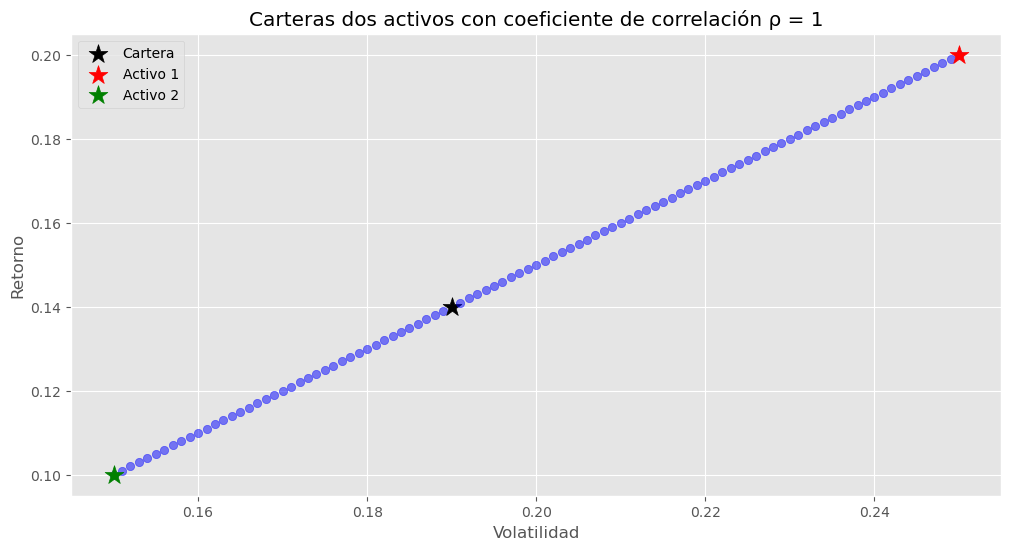

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))

x = np.linspace(0, 1, 101) #generamos 101 puntos entre 0 y 1 que representan los pesos del activo 1

for i in x:
    reti = calc_ret_cartera(i, 1 - i, ret1, ret2) #calculamos el retorno de la cartera para cada peso
    stdi = calc_std_cartera(i, 1 - i, std1, std2, coef_corr) #calculamos la volatilidad de la cartera para cada peso
    if i == p1:
        plt.scatter(stdi, reti, color='black', marker='*', s=200, label='Cartera') #marcamos el punto de la cartera
    else:
        plt.scatter(stdi, reti, color='blue', alpha=0.5) #marcamos el resto de puntos

plt.scatter(std1, ret1, color='red', marker='*', s=200, label='Activo 1') #marcamos el punto del activo 1
plt.scatter(std2, ret2, color='green', marker='*', s=200, label='Activo 2') #marcamos el punto del activo 2

plt.xlabel('Volatilidad')
plt.ylabel('Retorno')
plt.title('Carteras dos activos con coeficiente de correlación \u03C1 = 1')
plt.legend()
plt.show()

---

### Caso 2:  $\quad$  $\rho_{12} = -1$

* Si $\rho_{12} = -1$ se dice que los activos son **perfectamente pero negativamente** correlacionados.

    - Hay máximos beneficios de diversificación.

    - La rentabilidad de la cartera es igual (recordad que no depenede de las relaccciones entre activos).
        - $E(\tilde R_P) = w_1 E(\tilde R_1) + w_2 E(\tilde R_2)$
        $$$$
        

    - La volatilidad de la cartera es igual a la suma ponderada de las volatilidades de los activos.
        - $\sigma_P = w_1 \sigma_1 - w_2 \sigma_2\ \ \ \ \ \ $    OJO: el resultado debe ser positivo

In [10]:
# definimos el coeficiente de correlación
coef_corr_neg = -1

In [11]:
# calculamos la rentabilidad y volatilidad de la cartera con el nuevo coeficiente de correlación
print(f'El retorno de la cartera es:{100*calc_ret_cartera(p1, p2, ret1, ret2):.2f} %')
print(f'La volatilidad de la cartera es:{100*calc_std_cartera(p1, p2, std1, std2, coef_corr_neg):.2f} %')

El retorno de la cartera es:14.00 %
La volatilidad de la cartera es:1.00 %


Recordad que con $\rho_{12}=1$ nos dió:

* $E(\tilde R_p) = 14$%

* $\sigma_p = 19$%

y con el $\rho_{12}=-1$ y nos ha dado:

* $E(\tilde R_p) = 14$%

* $\sigma_p = 1$%

Gracias a la **diversificación**, obtenemos la misma rentabilidad pero **menor volatilidad**.

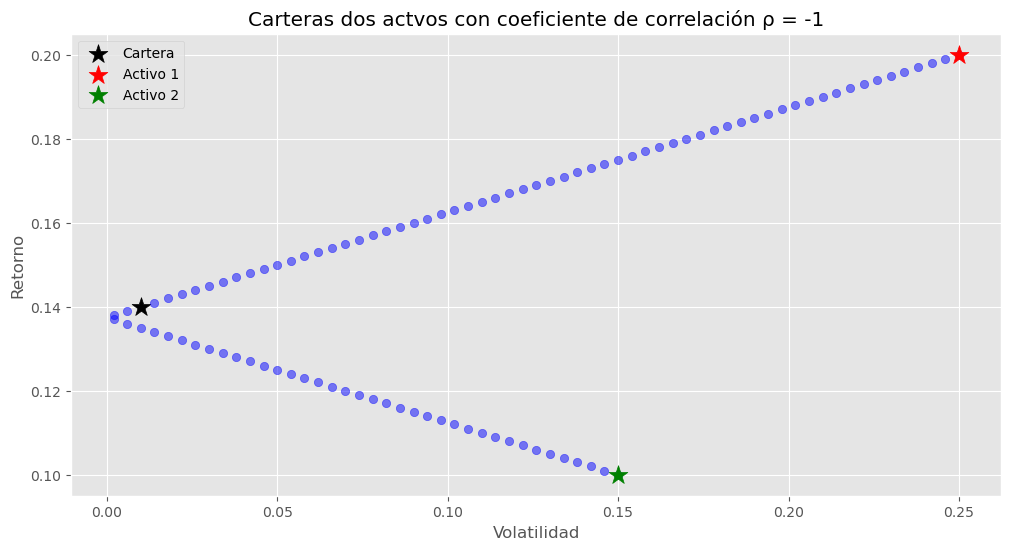

In [12]:
x = np.linspace(0, 1, 101) #generamos 101 puntos entre 0 y 1 que representan los pesos del activo 1

fig, ax = plt.subplots(figsize=(12, 6))

for i in x:
    reti = calc_ret_cartera(i, 1 - i, ret1, ret2) #calculamos el retorno de la cartera para cada peso
    stdi = calc_std_cartera(i, 1 - i, std1, std2, coef_corr_neg) #calculamos la volatilidad de la cartera para cada peso
    if i == p1:
        plt.scatter(stdi, reti, color='black', marker='*', s=200, label='Cartera') #marcamos el punto de la cartera
    else:
        plt.scatter(stdi, reti, color='blue', alpha=0.5) #marcamos el resto de puntos

plt.scatter(std1, ret1, color='red', marker='*', s=200, label='Activo 1') #marcamos el punto del activo 1
plt.scatter(std2, ret2, color='green', marker='*', s=200, label='Activo 2') #marcamos el punto del activo 2

plt.xlabel('Volatilidad')
plt.ylabel('Retorno')
plt.title('Carteras dos actvos con coeficiente de correlación \u03C1 = -1')
plt.legend()
plt.show()

---

### Caso 3: $\quad$    $-1\leq \rho_{12} \leq 1$

* Si $-1 \leq \rho_{12} \leq 1$ se dice que los activos tienen correlación **lineal no perfecta**.

    - Hay beneficios de diversificación, a mayor correlación negativa mayor beneficio.

    - La rentabilidad de la cartera es igual (recordad que no depenede de las relaccciones entre activos).
        - $E(\tilde R_P) = w_1 E(\tilde R_1) + w_2 E(\tilde R_2)$
        $$$$
        
    - La varianza de la cartera es igual a:
        - $\sigma²(\tilde R_p)= \underset{Activo 1} {\underbrace{w_1²\sigma²(\tilde R_1)}}+\underset{Activo 2} {\underbrace{w_2²\sigma²(\tilde R_2)}}+ \underset{Relacion entre activos} {\underbrace{2w_1w_2 \rho_{12} \sigma_1 \sigma_2}}$
        $$$$

    - La volatilidad de la cartera es igual a la raiz cuadrada de la varianza.
        - $\sigma(\tilde R_p)= \sqrt{w_1²\sigma²(\tilde R_1)+w_2²\sigma²(\tilde R_2)+ 2w_1w_2 \rho_{12} \sigma_1 \sigma_2} $

        

In [14]:
x = np.linspace(0, 1, 101)
coef_corr_lst = [-1, -0.8, -0.5, 0, 0.5, 1]

# Definir un mapa de colores basado en coef_corr_lst
#colors = ['#440154', '#3b528b', '#21918c', '#5ec962', '#fde725', '#f0f921'] # con amarillos
colors = ['#440154', '#3b528b', '#21918c', '#5ec962', '#3366CC', '#FF6633']

# Ajustar el tamaño de la
layout_width = 1200  # Ancho en píxeles
layout_height = 700  # Altura en píxeles

# Crear la figura de plotly
fig = go.Figure()

for idx, coef_corr_i in enumerate(coef_corr_lst):
    ret_lst = []
    std_lst = []

    for i in x:
        reti = calc_ret_cartera(i, 1 - i, ret1, ret2) 
        stdi = calc_std_cartera(i, 1 - i, std1, std2, coef_corr_i) 

        ret_lst.append(reti)
        std_lst.append(stdi)

    fig.add_trace(go.Scatter(x=std_lst, y=ret_lst, mode='markers', 
                             name=f'Corr {coef_corr_i}', marker=dict(color=colors[idx], size=8, opacity=0.5)))

# Añadir puntos de activos individuales
fig.add_trace(go.Scatter(x=[std1], y=[ret1], mode='markers', marker=dict(color='red', size=20, symbol='star'),
                         name='Activo 1'))
fig.add_trace(go.Scatter(x=[std2], y=[ret2], mode='markers', marker=dict(color='green', size=20, symbol='star'),
                         name='Activo 2'))

# Configurar títulos y etiquetas

title_font_size = 20  # Tamaño de fuente del título

fig.update_layout(title='Cartera de dos activos variando el coeficiente de correlación',
                  font=dict(size=title_font_size),
                  title_x=0.5,
                  #xanchor='center',
                  xaxis_title='Volatilidad',
                  yaxis_title='Retorno',
                  )

# Mostrar el gráfico
fig.show()


## 2. Cálculo de la cartera de mínima volatilidad

Vamos a calcular la cartera de mínima varianza:

* Partimos de la fórmula de la varianza de la cartera:

    - $\sigma²(\tilde R_p)= w_1²\sigma²_1(\tilde R_1)+w_2²\sigma²_2(\tilde R_2)+ 2w_1w_2 \rho_{12} \sigma_1 \sigma_2 $
    $$$$

* Calculamos la derivada respecto de $w_1$, sustituimos $w_2=1-w_1$ e igualamos a 0:

    - $\dfrac{\partial \sigma²(\tilde R_p)}{\partial w_1}= 2w_1\sigma²(\tilde R_1)+2(1-w_1)\sigma²(\tilde R_2)+ 2(1-w_1) \rho_{12} \sigma_1 \sigma_2 = 0$
    $$$$

* Despejamos $w_1$:

    - $w_1 = \dfrac{\sigma_2²-\rho_{12} \sigma_1 \sigma_2}{\sigma_1²+\sigma_2²-2 \rho_{12} \sigma_1 \sigma_2}$
    


  



En el caso de dos activos con correlación $\rho_{12} = -1$:

* $w_1 = \dfrac{\sigma_2²+\sigma_1 \sigma_2}{\sigma_1²+\sigma_2²+2 \sigma_1 \sigma_2} = \dfrac{\sigma_2(\sigma_1+\sigma_2)}{(\sigma_1+\sigma_2)²} = \dfrac{\sigma_2}{\sigma_1+\sigma_2}$

Si lo aplicamos al ejemplo de la cartera con dos activos que hemos estado usando:

In [15]:
p1 = std2/(std1+std2)
p2 = 1 - p1
print(f'El peso del activo 1 es: {100*p1:.2f}%')
print(f'El peso del activo 2 es: {100*p2:.2f}%')


El peso del activo 1 es: 37.50%
El peso del activo 2 es: 62.50%


In [16]:
# calculamos la rentabilidad y volatilidad de la cartera con los nuevos pesos
print(f'El retorno de la cartera es:{100*calc_ret_cartera(p1, p2, ret1, ret2):.2f} %')
print(f'La volatilidad de la cartera es:{100*calc_std_cartera(p1, p2, std1, std2, coef_corr_neg):.2f} %')

El retorno de la cartera es:13.75 %
La volatilidad de la cartera es:0.00 %


**CONCLUSIONES**

Recordad que con los pesos iniciales y $\rho_{12}=1$ nos dió:

* $E(\tilde R_p) = 14$%

* $\sigma_p = 19$%

Y hemos visto que con $\rho_{12}=-1$ y la fórmula de la cartera de mínima varianza nos ha dado:

* $E(\tilde R_p) = 13.75$%

* $\sigma_p = 0$%

Gracias a la **diversificación**, obtenemos casi la misma rentabilidad pero **sin riesgo**.